# <span style = "color:IndianRed; font-size:40px"> Brain Tumor Classification (MRI)</span>

### Importing necessary libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics
import glob

### Fetching the training Data

In [14]:
glioma=glob.glob('Brain_tumor/Training/glioma_tumor/*jpg')
meningioma=glob.glob('Brain_tumor/Training/meningioma_tumor/*jpg')
no_tumor=glob.glob('Brain_tumor/Training/no_tumor/*jpg')
pituitary=glob.glob('Brain_tumor/Training/pituitary_tumor/*jpg')

### Fetching the testing data

In [15]:
glioma_test=glob.glob('Brain_tumor/Testing/glioma_tumor/*jpg')
meningioma_test=glob.glob('Brain_tumor/Testing/meningioma_tumor/*jpg')
no_tumor_test=glob.glob('Brain_tumor/Testing/no_tumor/*jpg')
pituitary_test=glob.glob('Brain_tumor/Testing/pituitary_tumor/*jpg')

### Find the number of images of all classes in the Training set

In [20]:
print('Number of images in Training set are:')
print('glioma:',len(glioma))
print('meningioma:',len(meningioma))
print('no tumor:',len(no_tumor))
print('pituitary:',len(pituitary))

Number of images in Training set are:
glioma: 84
meningioma: 72
no tumor: 72
pituitary: 84


### Finding the number of images of all classes in the testing set

In [21]:
print('Number of images in Testing set are:')
print('glioma:',len(glioma_test))
print('meningioma:',len(meningioma_test))
print('no tumor:',len(no_tumor_test))
print('pituitary:',len(pituitary_test))

Number of images in Testing set are:
glioma: 24
meningioma: 24
no tumor: 24
pituitary: 24


### Storing all the images inside a list and create a list with the corresponding labels

### For Training set

In [23]:
image=[]
label=[]

for i in glioma:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in meningioma:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in no_tumor:
    img=plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in pituitary:
    img=plt.imread(i)
    image.append(img)
    label.append(3)
    


### For Testing set

In [24]:
image_test=[]
label_test=[]

for i in glioma_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in meningioma_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    
for i in no_tumor_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in pituitary_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(3)
    


### Shuffle both image list and label list (In both Training and testing set)

In [25]:
image,label=shuffle(image,label,random_state=100)

In [26]:
image_test,label_test=shuffle(image_test,label_test,random_state=100)

### Plotting a few images from our shuffled list with its corresponding label 

In [29]:
d={0:'glioma',1:'meningioma',2:'no_tumor',3:'pituitary'}

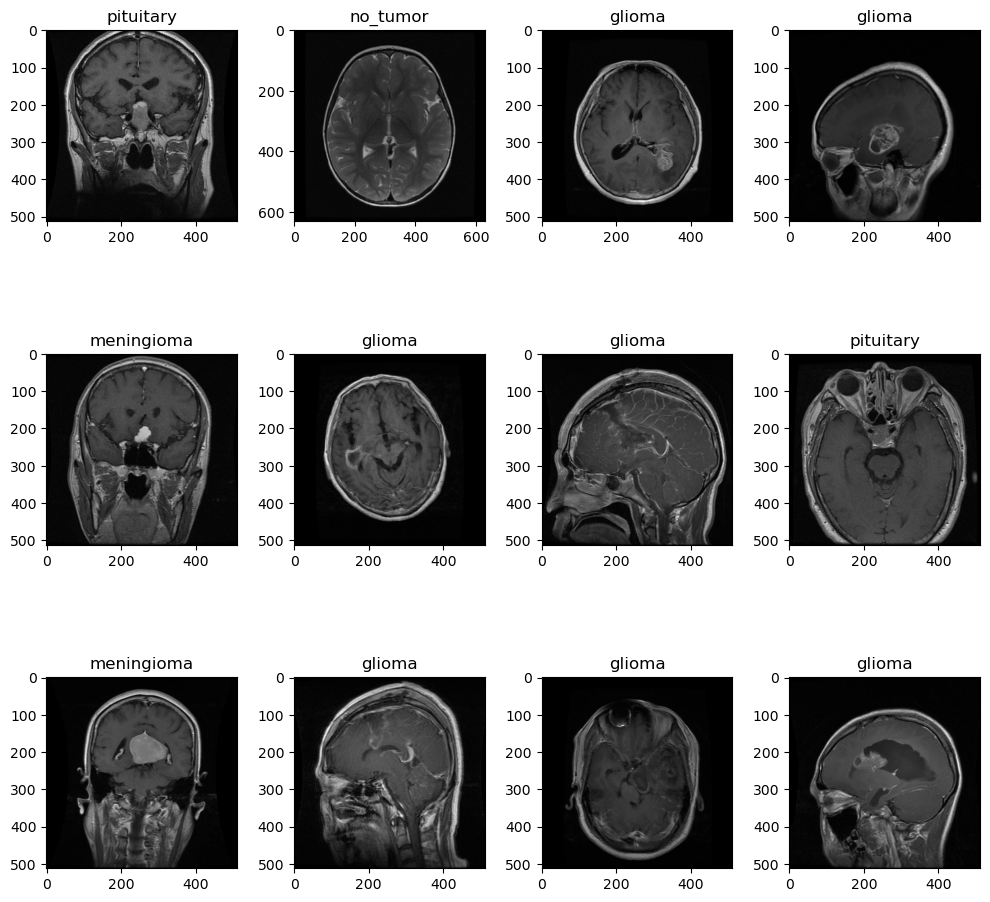

In [32]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i],cmap='gray')
    plt.title(d[label[i]])
plt.tight_layout()
    

### The shape of the first 10 images in our list 

In [46]:
for i in range(10):
    print (image[i].shape)

(512, 512, 3)
(630, 630, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


### Changing  the images to 224x224( For both training and testing set)

In [42]:
X_train=[]
for i in image:
    X_train.append(resize(i,(224,224,3)))
    
X_train= np.array(X_train)

In [44]:
X_test=[]
for i in image_test:
    X_test.append(resize(i,(224,224,3)))
    
X_test= np.array(X_test)

### Creating numpy arrays named y_train and y_test from our training and testing label lists wecreated earlier

In [45]:
y_train= np.array(label)
y_test= np.array(label_test)

### Plotting some of our reshaped images

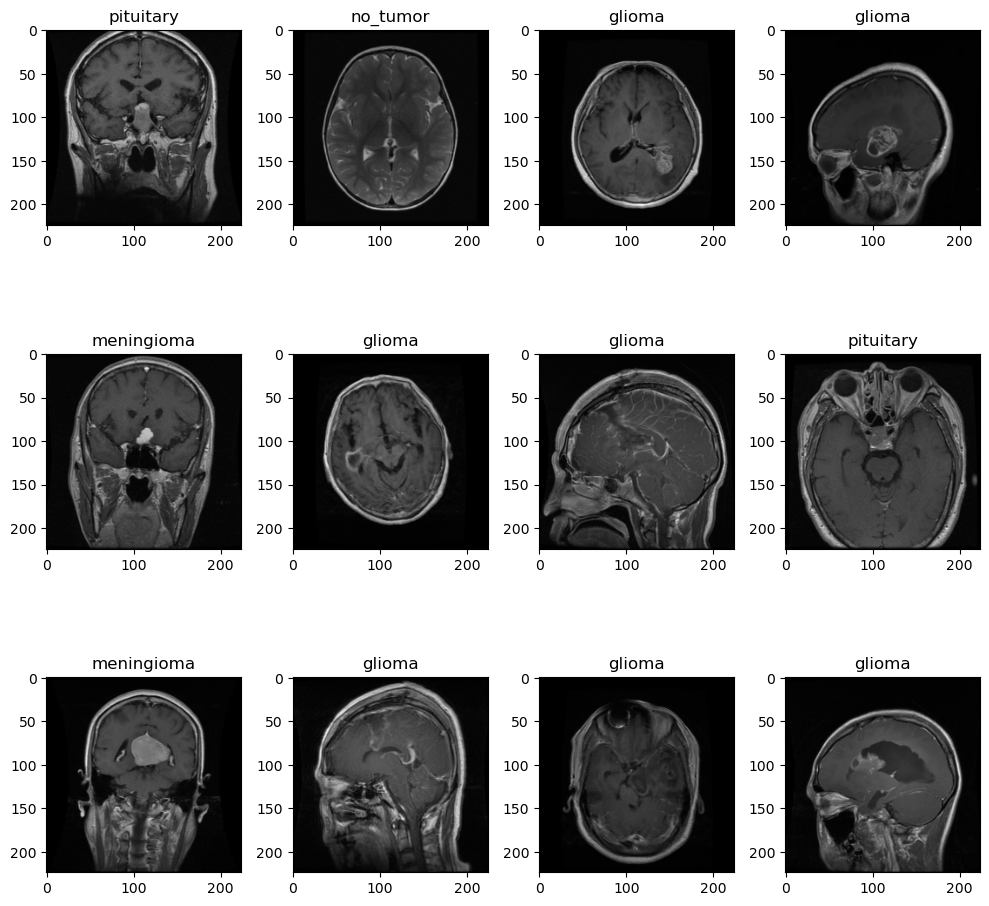

In [47]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(d[y_train[i]])
plt.tight_layout()
    

### Checking the shape of X_train and X_test and y_train and y_test

In [51]:
print('shape of X_train is:',X_train.shape)
print('shape of X_test is:',X_test.shape)
print('shape of y_train is:',y_train.shape)
print('shape of y_test is:',y_test.shape)

shape of X_train is: (312, 224, 224, 3)
shape of X_test is: (96, 224, 224, 3)
shape of y_train is: (312,)
shape of y_test is: (96,)


### Creating a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [66]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
])

### Compile the model

#### Using 'sparse_categorical_crossentropy' for loss

In [67]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### The summary of our model

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

### Training the model. 


In [70]:
model.fit(X_train,y_train,epochs=5,validation_split=0.05)

Epoch 1/5
10/10 [==============================] - 4s 373ms/step - loss: 2.0709e-04 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9375
Epoch 2/5
10/10 [==============================] - 4s 363ms/step - loss: 1.9416e-04 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9375
Epoch 3/5
10/10 [==============================] - 4s 364ms/step - loss: 1.8404e-04 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9375
Epoch 4/5
10/10 [==============================] - 3s 344ms/step - loss: 1.7262e-04 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9375
Epoch 5/5
10/10 [==============================] - 4s 350ms/step - loss: 1.6477e-04 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9375


### Evaluate the model

In [71]:
model.evaluate(X_train,y_train)

10/10 [==============================] - 1s 54ms/step - loss: 0.0055 - accuracy: 0.9968


[0.005488577764481306, 0.9967948794364929]

### Making predictions with X_test

In [76]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 55ms/step


In [77]:
y_pred[0:5]

array([[9.9963152e-01, 8.8645542e-01, 9.9046910e-01, 4.0400726e-01],
       [6.8534678e-01, 3.2925338e-06, 1.0000000e+00, 9.9997634e-01],
       [5.1201038e-02, 1.2247915e-04, 1.0000000e+00, 9.9999356e-01],
       [9.3543732e-01, 2.9241667e-07, 1.0000000e+00, 9.9976486e-01],
       [5.0795481e-02, 9.9794024e-01, 9.9862349e-01, 2.1201727e-01]],
      dtype=float32)

### Using np.argmax to fetch indices of max element of the array

Store the values in a list

In [80]:
y_pred=[np.argmax(i)for i in y_pred]

In [81]:
y_pred[:5]

[0, 2, 2, 2, 2]

### Plotting X_test with label from our prediction

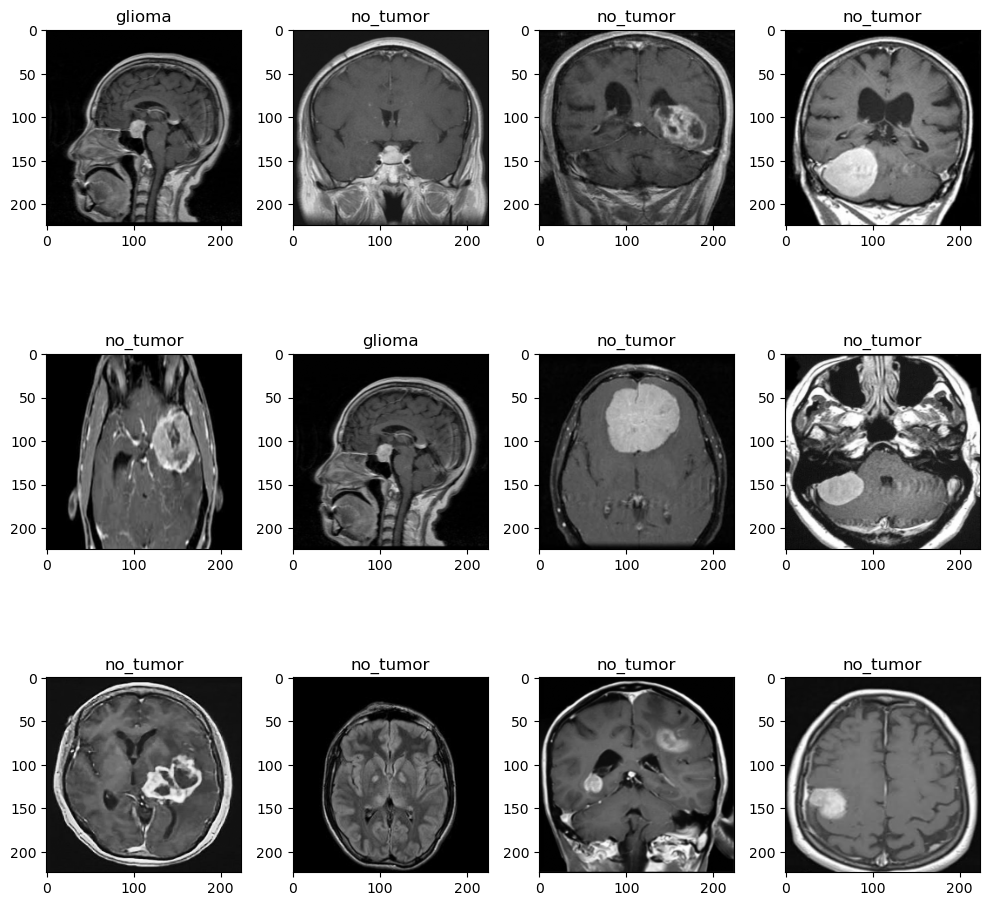

In [82]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title(d[y_pred[i]])
plt.tight_layout()
    

### Visualizing confusion matrix on a heatmap

<Axes: >

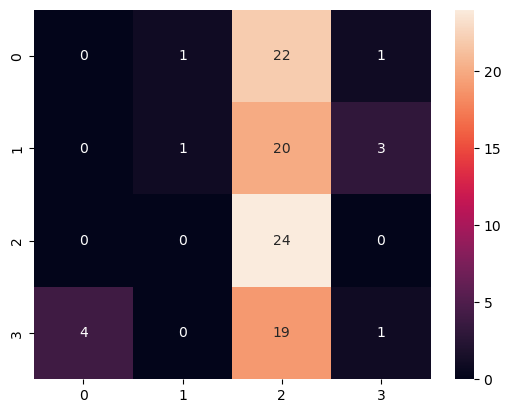

In [85]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')